**<h1><center>House Price Prediction</center></h1>**

In this project we will create a Machine Learning model which will predict the price of the house by providing various features of the house. Here we are using kaggle data set https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data for training the model.

**<h2>Contents</h2>**

1. Importing Packages
2. Loading Data
3. Checking Distribution
4. Null Imputation
5. Outlier Detection
6. Removing Redundent Feature
7. Feature Engineering


**1. Importing Packages**







In [1]:
# Accessing drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**2. Loading Data**
 
 Here we will load train and test csv files using pandas read_csv function. And we will inspect some details about these files. Like number of columns and their data types and memory used.

In [3]:
train_data = pd.read_csv("/content/drive/My Drive/Real Time Projects/\
House Price Prediction/Data Files/train.csv")

test_data = pd.read_csv("/content/drive/My Drive/Real Time Projects/\
House Price Prediction/Data Files/test.csv")

print("Train data has {} rows and {} columns".format(train_data.shape[0], \
                                                     train_data.shape[1]))
print("\nTest data has {} rows and {} columns".format(test_data.shape[0], \
                                                     test_data.shape[1]))


Train data has 1460 rows and 81 columns

Test data has 1459 rows and 80 columns


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Above gives information about the dataframe. Train data has 81 features , in that 43 are categorical features and 38 are numerical features. Categorical feature are represented as object and numerical features are represented as float64 and int64.

- Categorical Features:
  
  ```
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities'
  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
  'SaleType', 'SaleCondition'
  ```

- Numerical Features

  ```
  'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
  'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
  'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
  ```

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


If you focus on count row, if the value is less than 1460 then it means that column has null values. If you focus on 75%, and max row if thier is lot of difference between these two rows then it means that column as more outliers.


**3. Checking Distribution**

- Numerical Features : For Numerical features we can use distplot or hist plot to check distribution. 
  ```
  seaborn.distplot(a=None, 
                   bins=None, 
                   hist=True, 
                   kde=True, 
                   label=None, 
                   ax=None)
   
   a : Series, 1d-array, or list.
       Observed data. If this is a Series object with a name attribute, the
       name will be used to label the data axis.
  
  bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins. If unspecified, as reference rule is used
        that tries to find a useful default.

  ```

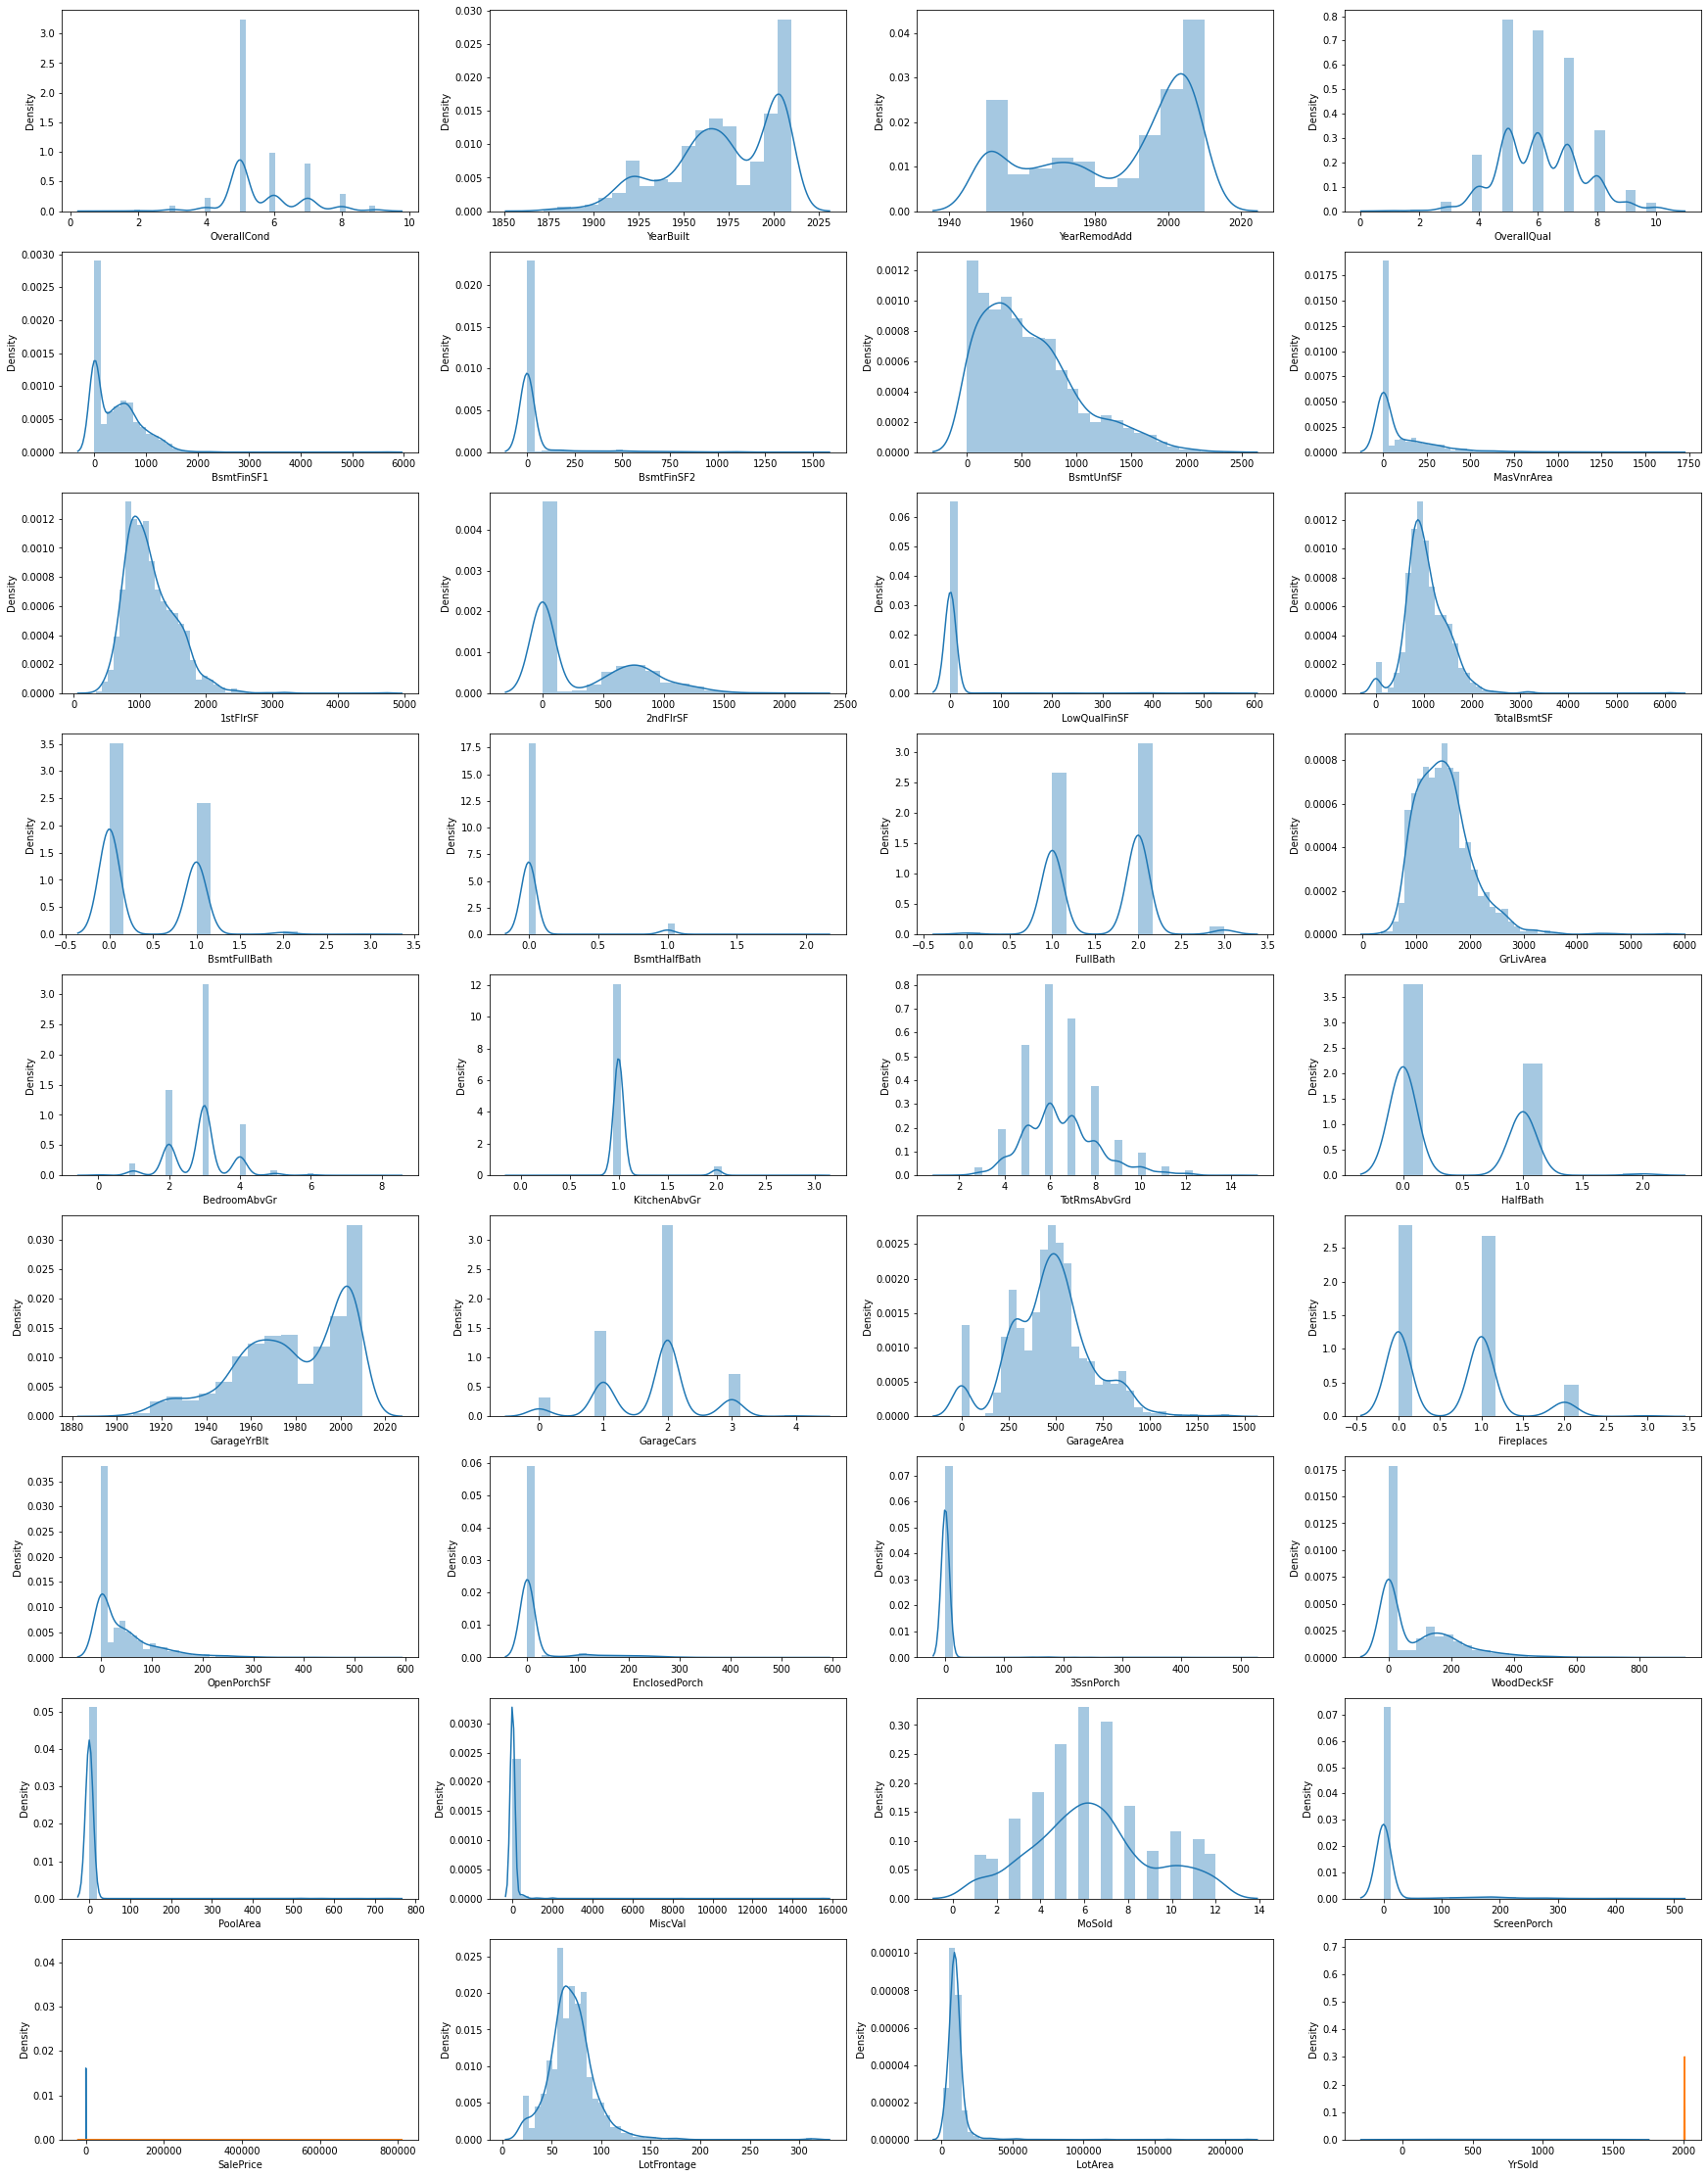

In [6]:
def plot_distplot(numerical_features):
    """
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//4, 
                             ncols = 4, 
                             figsize = (30,40)
                             )
    for i , feature in enumerate(numerical_features):
        sns.distplot(train_data[feature],
                     ax = axes[(i//4)-1, int(i%4)-1])
    

numerical_features = train_data.select_dtypes(exclude = 'object').columns
plot_distplot(numerical_features)



From above plots we can observed that these plots are not following normal distribution. Some algorithms needs feature should be normally distributed. We will look into later.

- Categorical Features : For Categorical features we can use countplot  check distribution. 

  ```
  seaborn.countplot(x=None, 
                    y=None, 
                    data=None, 
                    ax=None)
                    
  ```

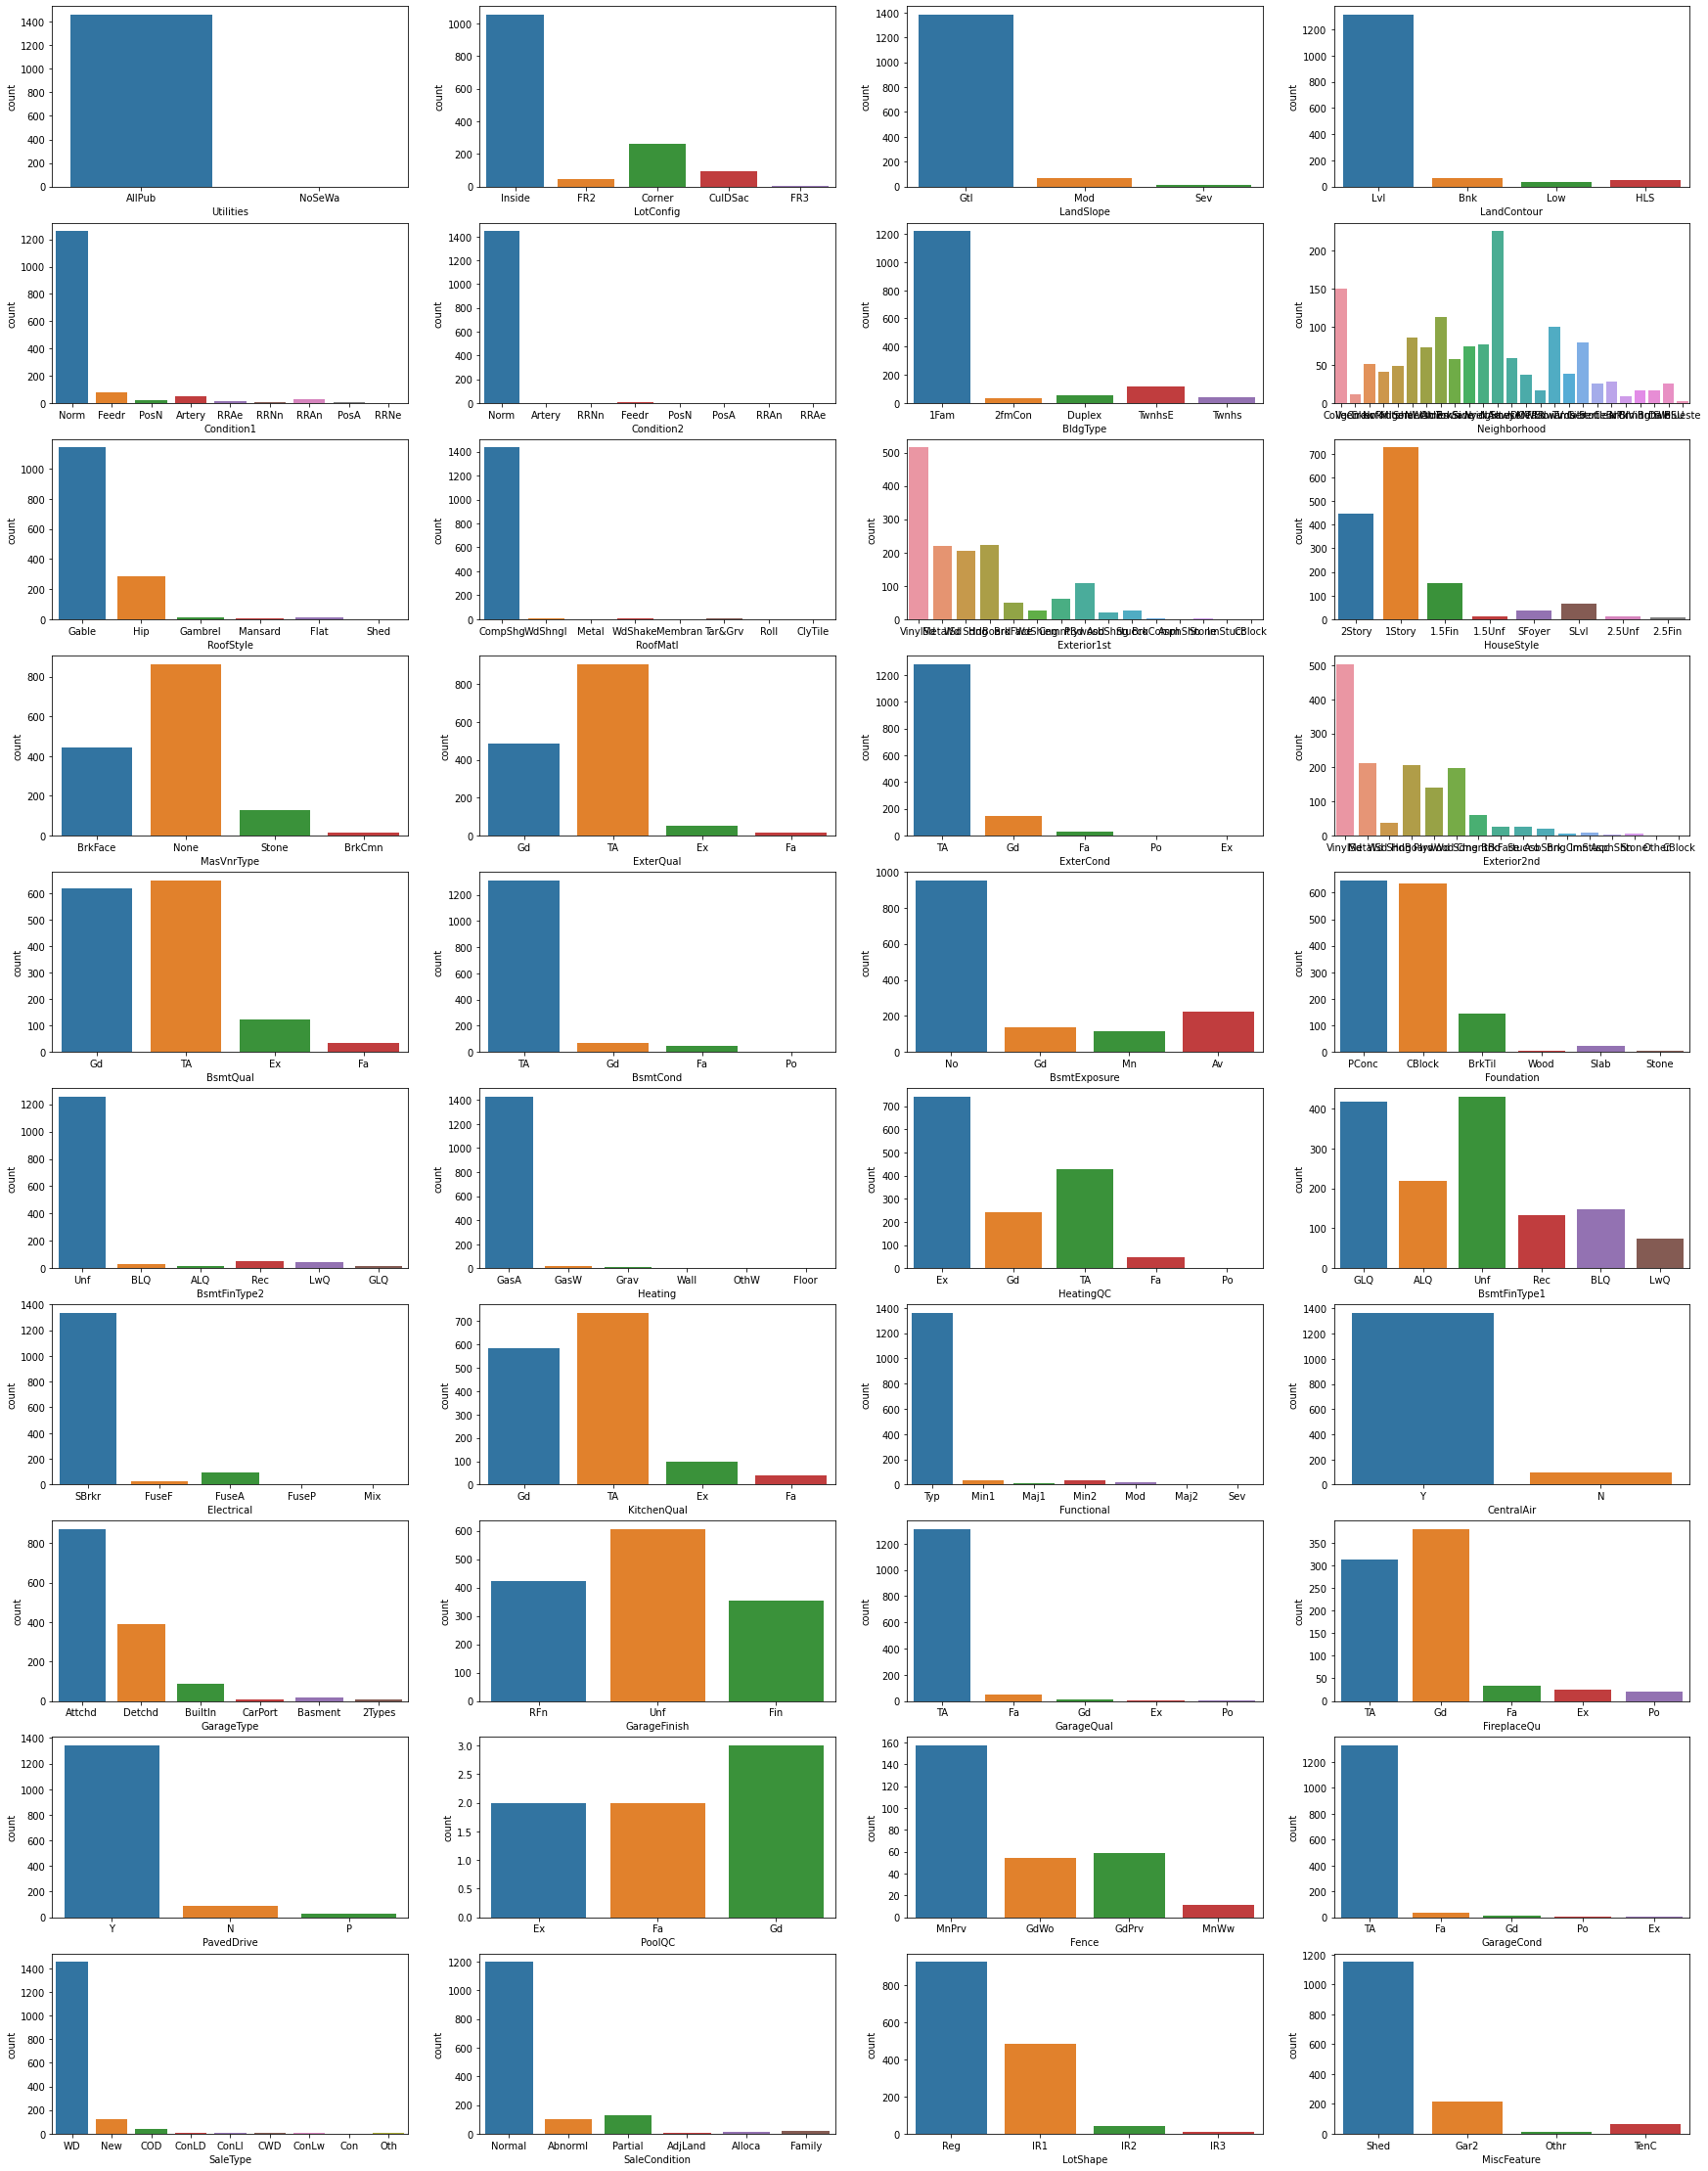

In [7]:
def plot_countplot(categorical_features):
    """
    """
    fig, axes = plt.subplots(nrows = len(categorical_features)//4, 
                             ncols = 4, 
                             figsize = (30,40))
    for i , feature in enumerate(categorical_features):
        sns.countplot(x = feature, 
                      data = train_data,
                      ax = axes[(i//4)-1, int(i%4)-1])

categorical_features = train_data.select_dtypes(include = 'object').columns
plot_countplot(categorical_features)




From above plot observed that some features has only one category has high frequency.





**4. Null Values Treatment**

Their are two types of data where different null values treatment performed on different data types
1. Numerical Data Types

2. Categorical Data types.

In [8]:
total_data = pd.concat([train_data, test_data])

total_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
total_data.shape

(2919, 81)

In [10]:
total_data.isnull().sum().sort_values(ascending = False).head(50)/len(total_data)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
SalePrice        0.499829
FireplaceQu      0.486468
LotFrontage      0.166495
GarageFinish     0.054471
GarageQual       0.054471
GarageCond       0.054471
GarageYrBlt      0.054471
GarageType       0.053786
BsmtExposure     0.028092
BsmtCond         0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MasVnrArea       0.007879
MSZoning         0.001370
Functional       0.000685
BsmtHalfBath     0.000685
BsmtFullBath     0.000685
Utilities        0.000685
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
SaleType         0.000343
Electrical       0.000343
GarageCars       0.000343
TotalBsmtSF      0.000343
GarageArea       0.000343
Exterior2nd      0.000343
Exterior1st      0.000343
KitchenQual      0.000343
BsmtUnfSF        0.000343
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
SaleCondition    0.000000
OpenPorchSF 

As we will remove feature which has highest null values. If feature has more than 40% of null values then we will remove that feature. 


Here  PoolQC, MiscFeature, Alley, Fence, SalePrice, FireplaceQu are having highest null values.

In [11]:
total_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis = 1, inplace = True)

**Categorical Features**

- categorical features that has null values are 
```
GarageType, GarageFinish, GarageQual, GarageCond, BsmtCond, 
BsmtQual, BsmtExposure, BsmtFinType2, BsmtFinType1,
MasVnrType, MSZoning, Functional, Utilities, 
Electrical, KitchenQual, Exterior2nd, SaleType, Exterior1st.
```
In this some feature has option to fill NA for null values.

In [12]:
# We can replace NA value for filling null values
for column in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    total_data[column].fillna('NA', inplace = True)

for  column in ('BsmtCond','BsmtQual'):
    total_data[column].fillna('NA', inplace = True)

for column in ('BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType'):
    total_data[column].fillna('NA', inplace = True)


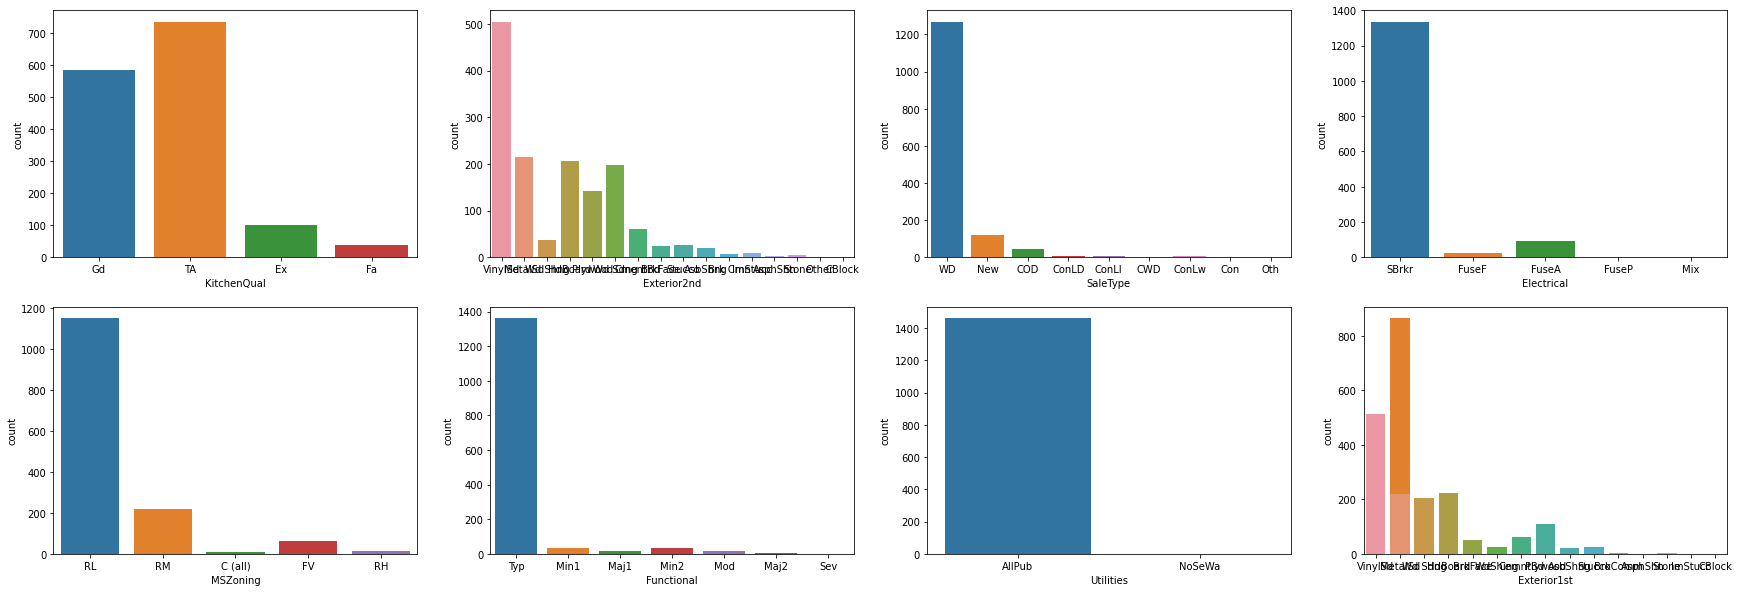

In [13]:
def plot_countplot(categorical_features):
    """
    """
    fig, axes = plt.subplots(nrows = len(categorical_features)//4, 
                             ncols = 4, 
                             figsize = (30,10))
    for i , feature in enumerate(categorical_features):
        sns.countplot(x = feature, 
                      data = train_data,
                      ax = axes[(i//4)-1, int(i%4)-1])

categorical_features = ['MasVnrType', 'MSZoning', 'Functional', 
                        'Utilities', 'Electrical', 'KitchenQual', 
                        'Exterior2nd', 'SaleType', 'Exterior1st']
plot_countplot(categorical_features)


In [14]:
# MSZoning, Functional, SaleType,Electrical, Utilities these feature has only one category for almost more than 80%

total_data.drop(['MSZoning', 'Functional', 'SaleType',
                 'Electrical', 'Utilities'], axis = 1, inplace = True)

In [15]:
for column in ('KitchenQual','Exterior1st','Exterior2nd'):
    total_data[column].fillna(total_data[column].mode()[0], inplace = True)


**Numerical Features**

- Numerical features that has null values are 
```
LotFrontage, GarageYrBlt, MasVnrArea, BsmtHalfBath, BsmtFullBath, 
GarageCars, GarageArea, TotalBsmtSF, BsmtUnfSF, 
BsmtFinSF1, BsmtFinSF2
```

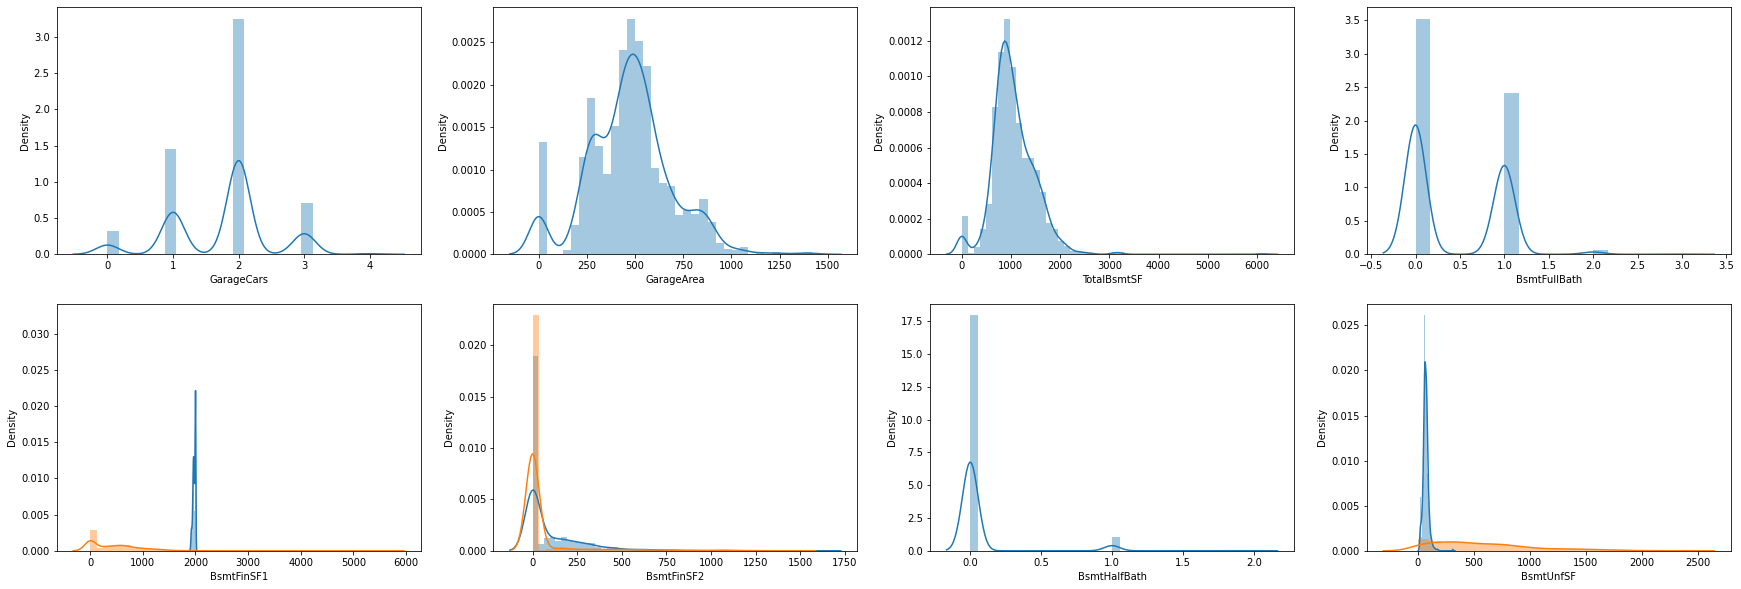

In [16]:
numerical  = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 
              'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 
              'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 
              'BsmtFinSF1', 'BsmtFinSF2']


def plot_distplot(numerical_features):
    """
    """
    fig, axes = plt.subplots(nrows = len(numerical_features)//4, 
                             ncols = 4, 
                             figsize = (30,10)
                             )
    for i , feature in enumerate(numerical_features):
        sns.distplot(train_data[feature],
                     ax = axes[(i//4)-1, int(i%4)-1])
    

plot_distplot(numerical)


In [17]:
for column in ('LotFrontage','TotalBsmtSF','BsmtUnfSF',
               'BsmtFinSF1','BsmtFinSF2'):
    total_data[column].fillna(total_data[column].median(), inplace = True)

In [18]:
total_data.loc[total_data['GarageYrBlt'].isnull(),['GarageType','GarageYrBlt']]

,GarageType,GarageYrBlt
39,NA,NaN
48,NA,NaN
78,NA,NaN
88,NA,NaN
89,NA,NaN
...,...,...
1433,NA,NaN
1449,NA,NaN
1453,NA,NaN
1454,NA,NaN


In [19]:
masdf = total_data.loc[total_data['MasVnrArea'].isnull(),
                       ['MasVnrArea','MasVnrType']]

bsmtdf = total_data.loc[total_data['BsmtFullBath'].isnull(),
                        ['BsmtHalfBath','BsmtFullBath']]

garage = total_data.loc[total_data['GarageCars'].isnull(), 
                        ['GarageCars', 'GarageArea', 'GarageFinish']]

In [20]:
print(masdf)

print("\n", bsmtdf)

print("\n", garage)

      MasVnrArea MasVnrType
234          NaN         NA
529          NaN         NA
650          NaN         NA
936          NaN         NA
973          NaN         NA
977          NaN         NA
1243         NaN         NA
1278         NaN         NA
231          NaN         NA
246          NaN         NA
422          NaN         NA
532          NaN         NA
544          NaN         NA
581          NaN         NA
851          NaN         NA
865          NaN         NA
880          NaN         NA
889          NaN         NA
908          NaN         NA
1132         NaN         NA
1197         NaN         NA
1226         NaN         NA
1402         NaN         NA

      BsmtHalfBath  BsmtFullBath
660           NaN           NaN
728           NaN           NaN

       GarageCars  GarageArea GarageFinish
1116         NaN         NaN           NA


1. As we can see that GarageYrBlt, is having null values  when their is no garage. So replacing GarageYrBlt null values with zero.

2. As we can see that GarageYrBlt, is having null values 
when their is no garage. So replacing GarageYrBlt null values with zero.

In [21]:
for column in ('BsmtFullBath','BsmtHalfBath','GarageCars',
               'GarageArea','GarageYrBlt','MasVnrArea'):
    total_data[column].fillna(0.0, inplace = True)

In [22]:
total_data.isnull().sum().sort_values(ascending = False)

SalePrice       1459
FullBath           0
Fireplaces         0
TotRmsAbvGrd       0
KitchenQual        0
                ... 
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
TotalBsmtSF        0
Length: 71, dtype: int64

**5. Outlier Detection**

- Outliers can be detected visually by using the boxplot. Here we are not removing outliers because we have only less number of observation.

  ```
  seaborn.boxplot(x=None, 
                  y=None, 
                  data=None,
                  ax = None)
  ```

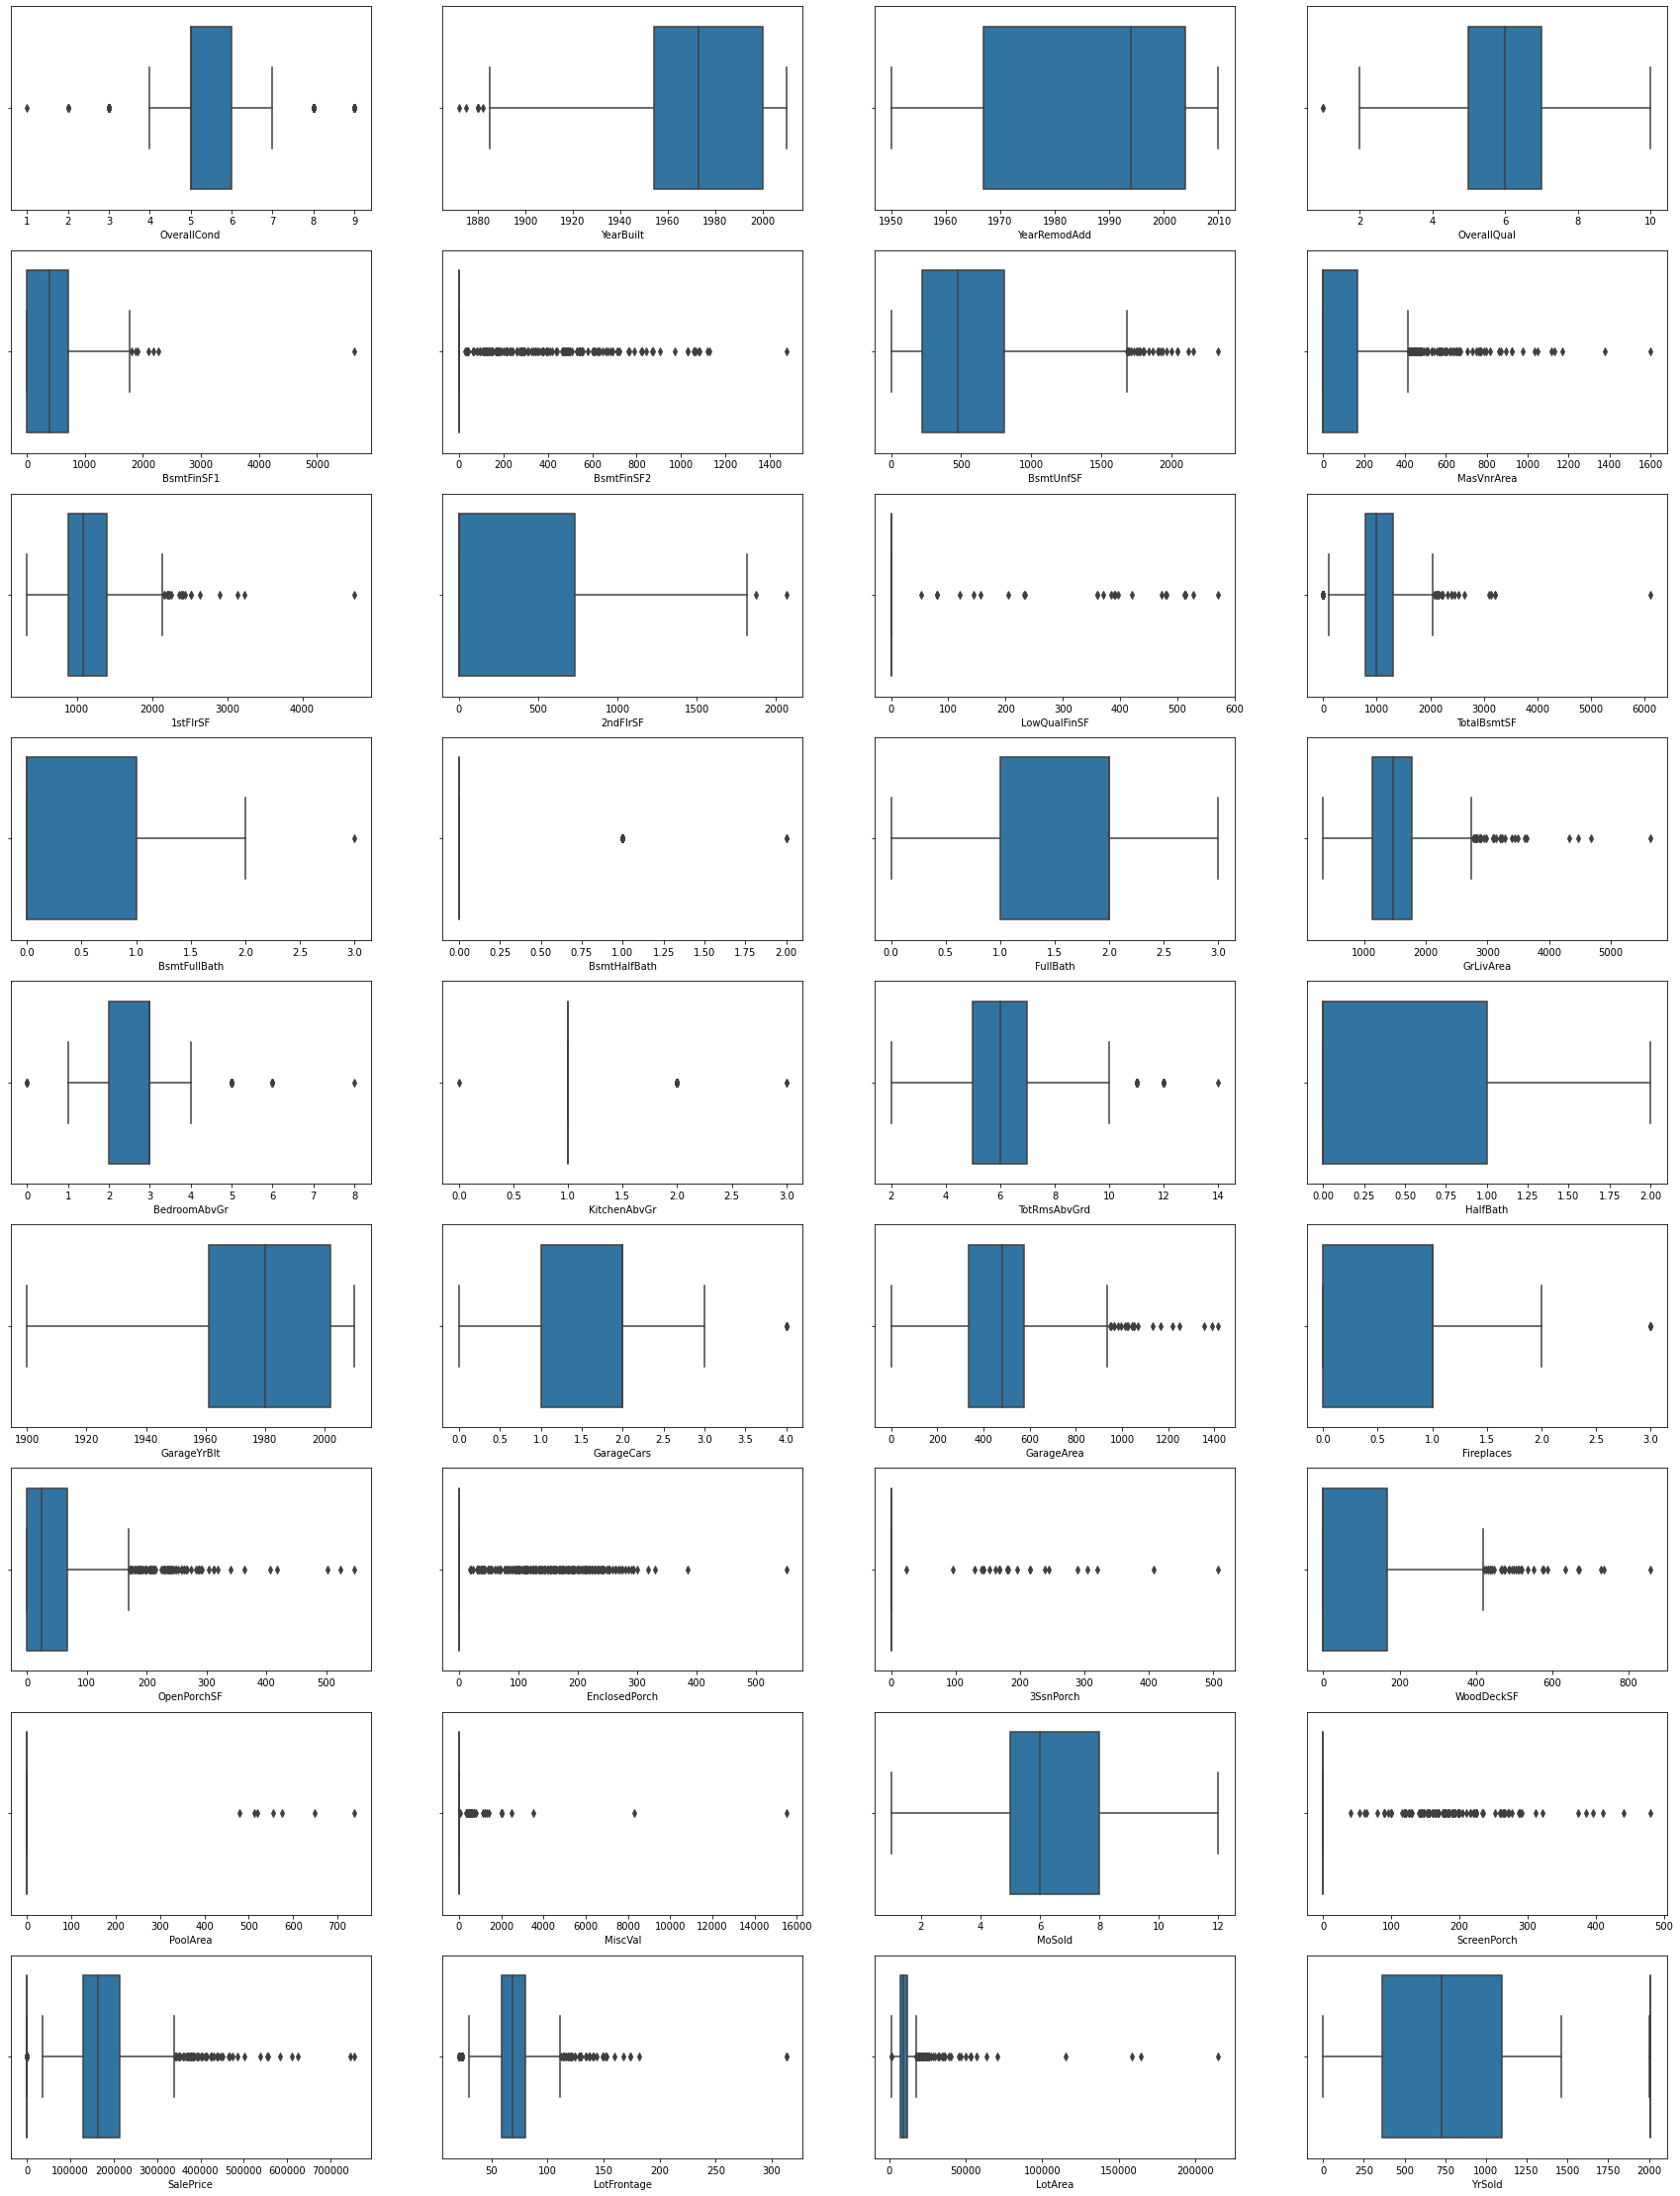

In [23]:
numerical_features = train_data.select_dtypes(exclude = 'object').columns
figure, axes = plt.subplots(nrows = len(numerical_features)//4, 
                            ncols = 4, 
                            figsize = (30,40))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x = feature, data = train_data, ax = axes[(i//4)-1, int(i%4)-1])

**6. Removing Redundent Features**

Here we are removing features which has 99% of values belongs to same category. 

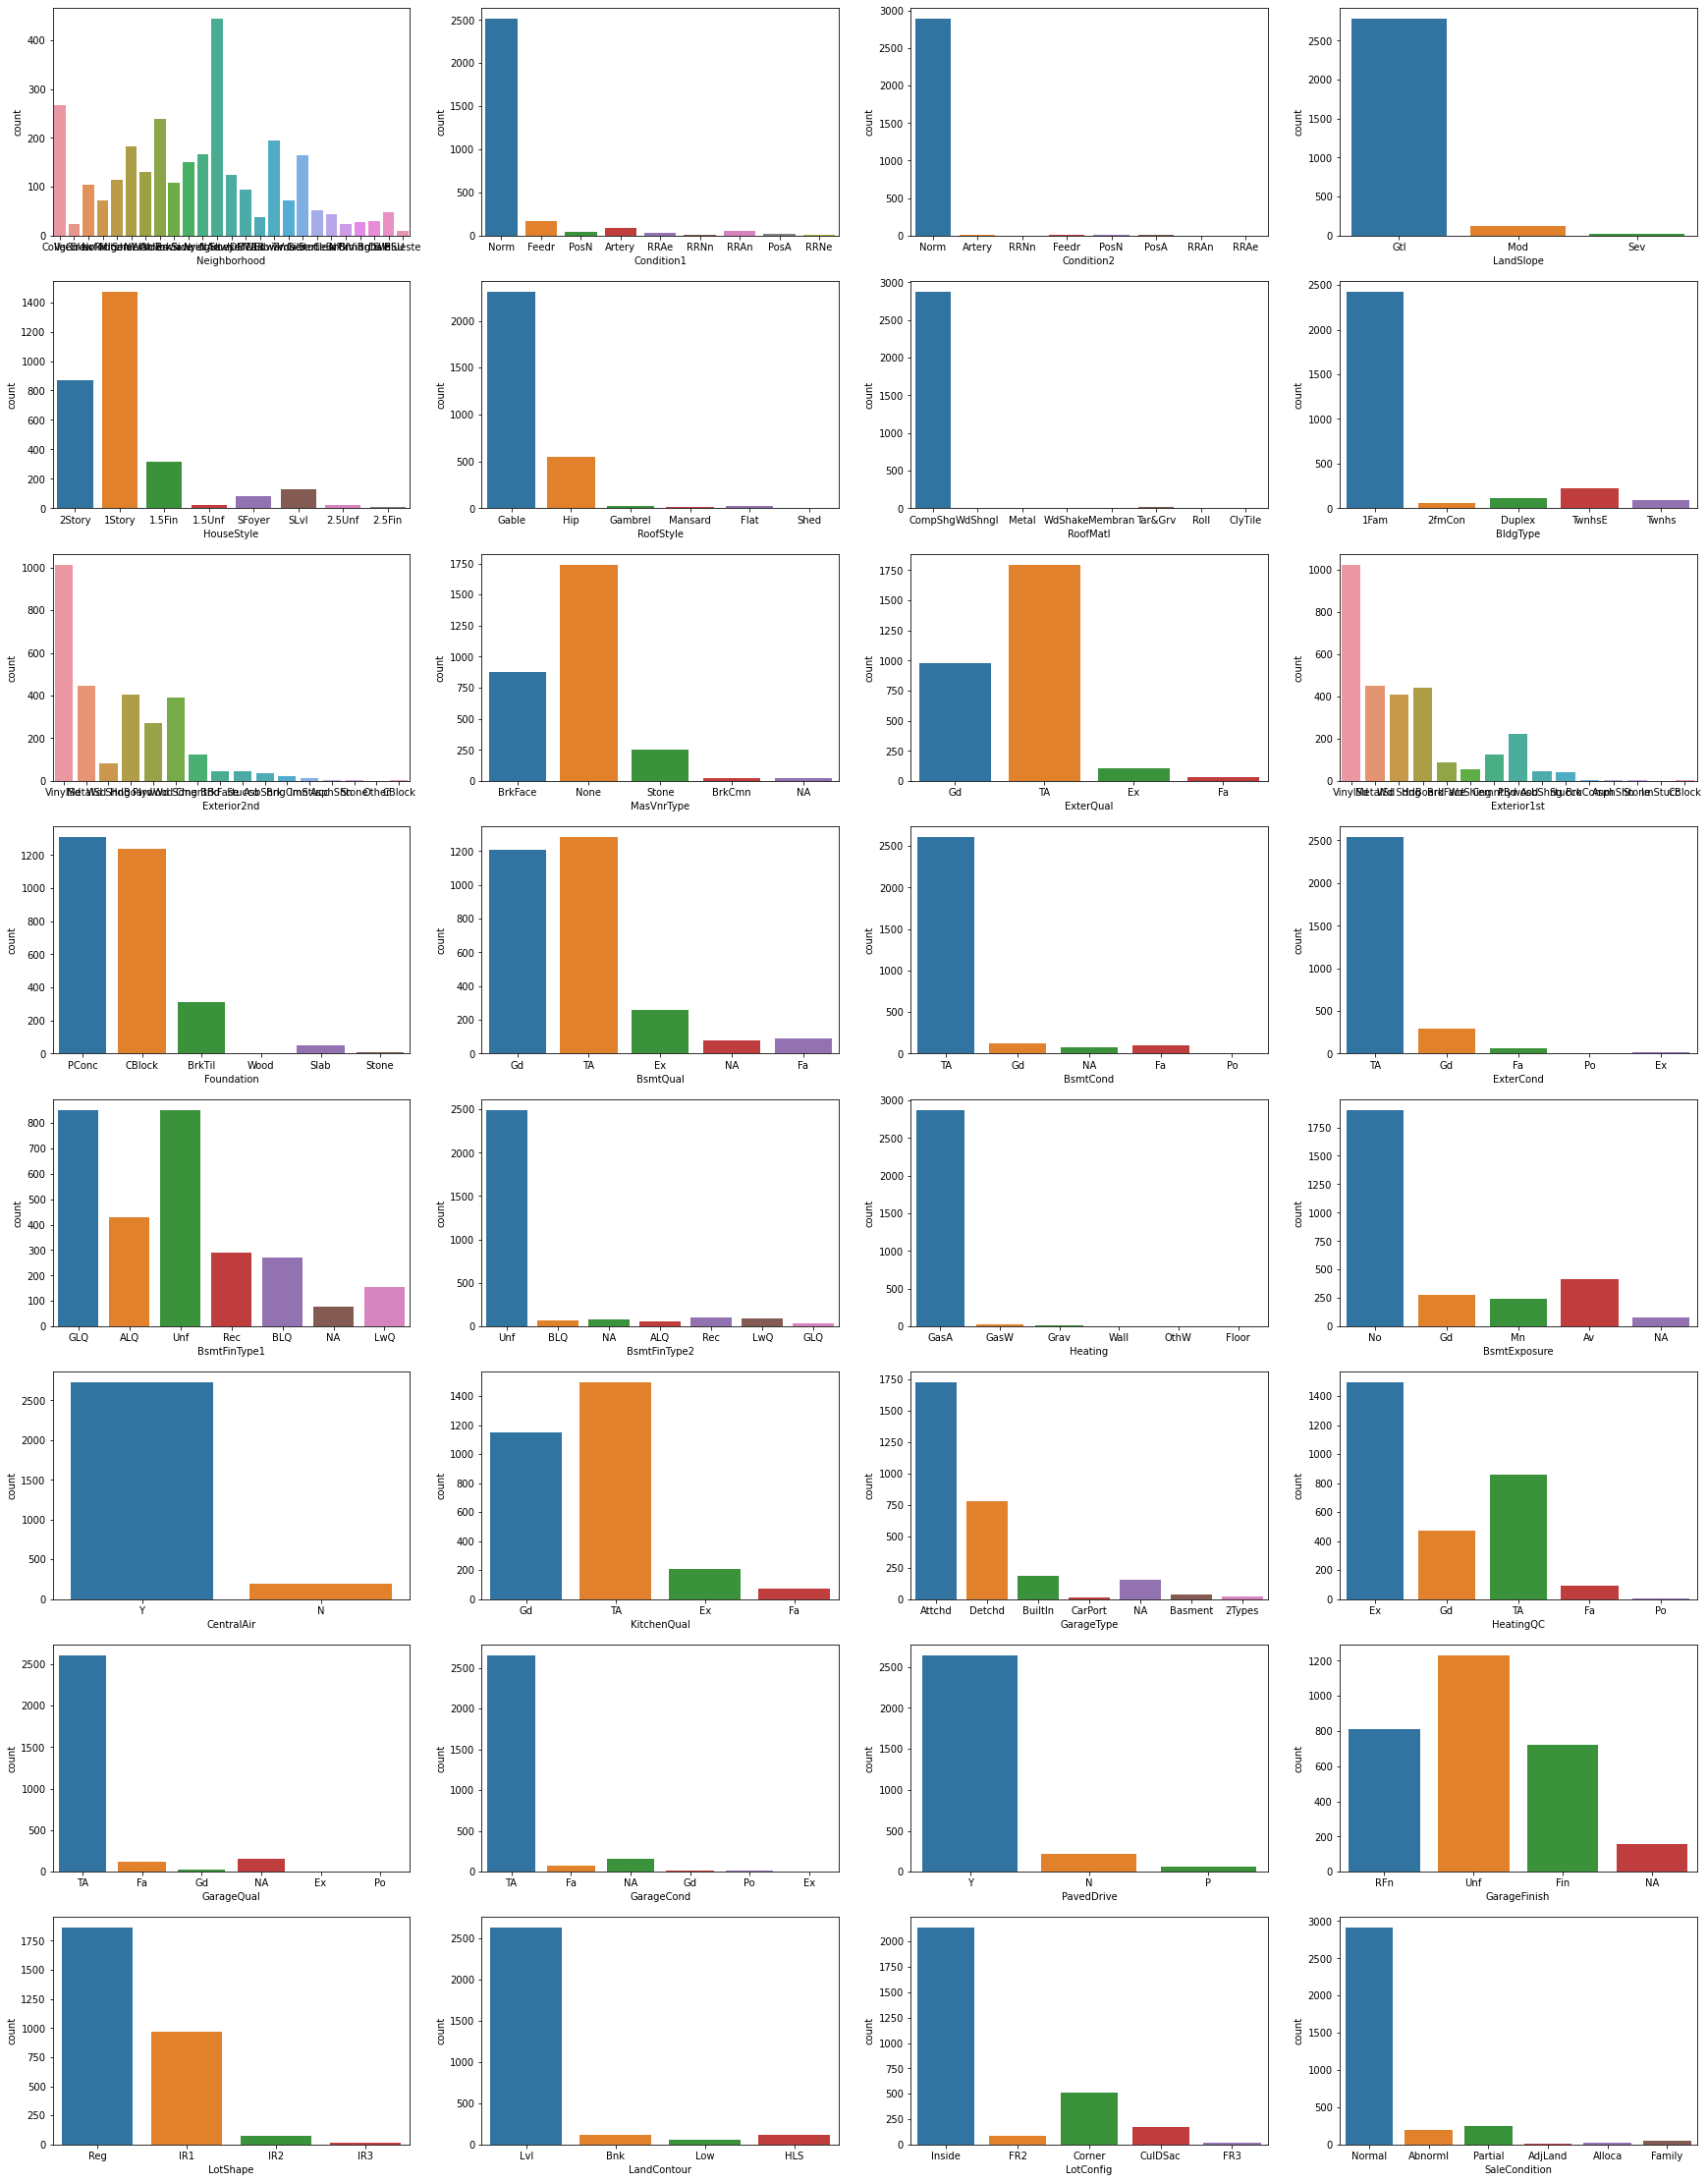

In [24]:
def plot_countplot(categorical_features):
    """
    """
    fig, axes = plt.subplots(nrows = len(categorical_features)//4, 
                             ncols = 4, 
                             figsize = (30,40))
    for i , feature in enumerate(categorical_features):
        sns.countplot(x = feature, 
                      data = total_data,
                      ax = axes[(i//4)-1, int(i%4)-1])

categorical_features = total_data.select_dtypes(include = 'object').columns
plot_countplot(categorical_features)




In [25]:
# we will remove features which has almost more than 50% to the single category.

total_data.drop(['LandSlope','LotConfig',
                 'LandContour','BldgType','Condition1',
                 'Condition2','RoofStyle','RoofMatl',
                 'BsmtCond','BsmtFinType2',
                 'Heating','CentralAir',
                 'GarageQual','PavedDrive',
                 'GarageCond'],
                axis = 1, inplace = True)

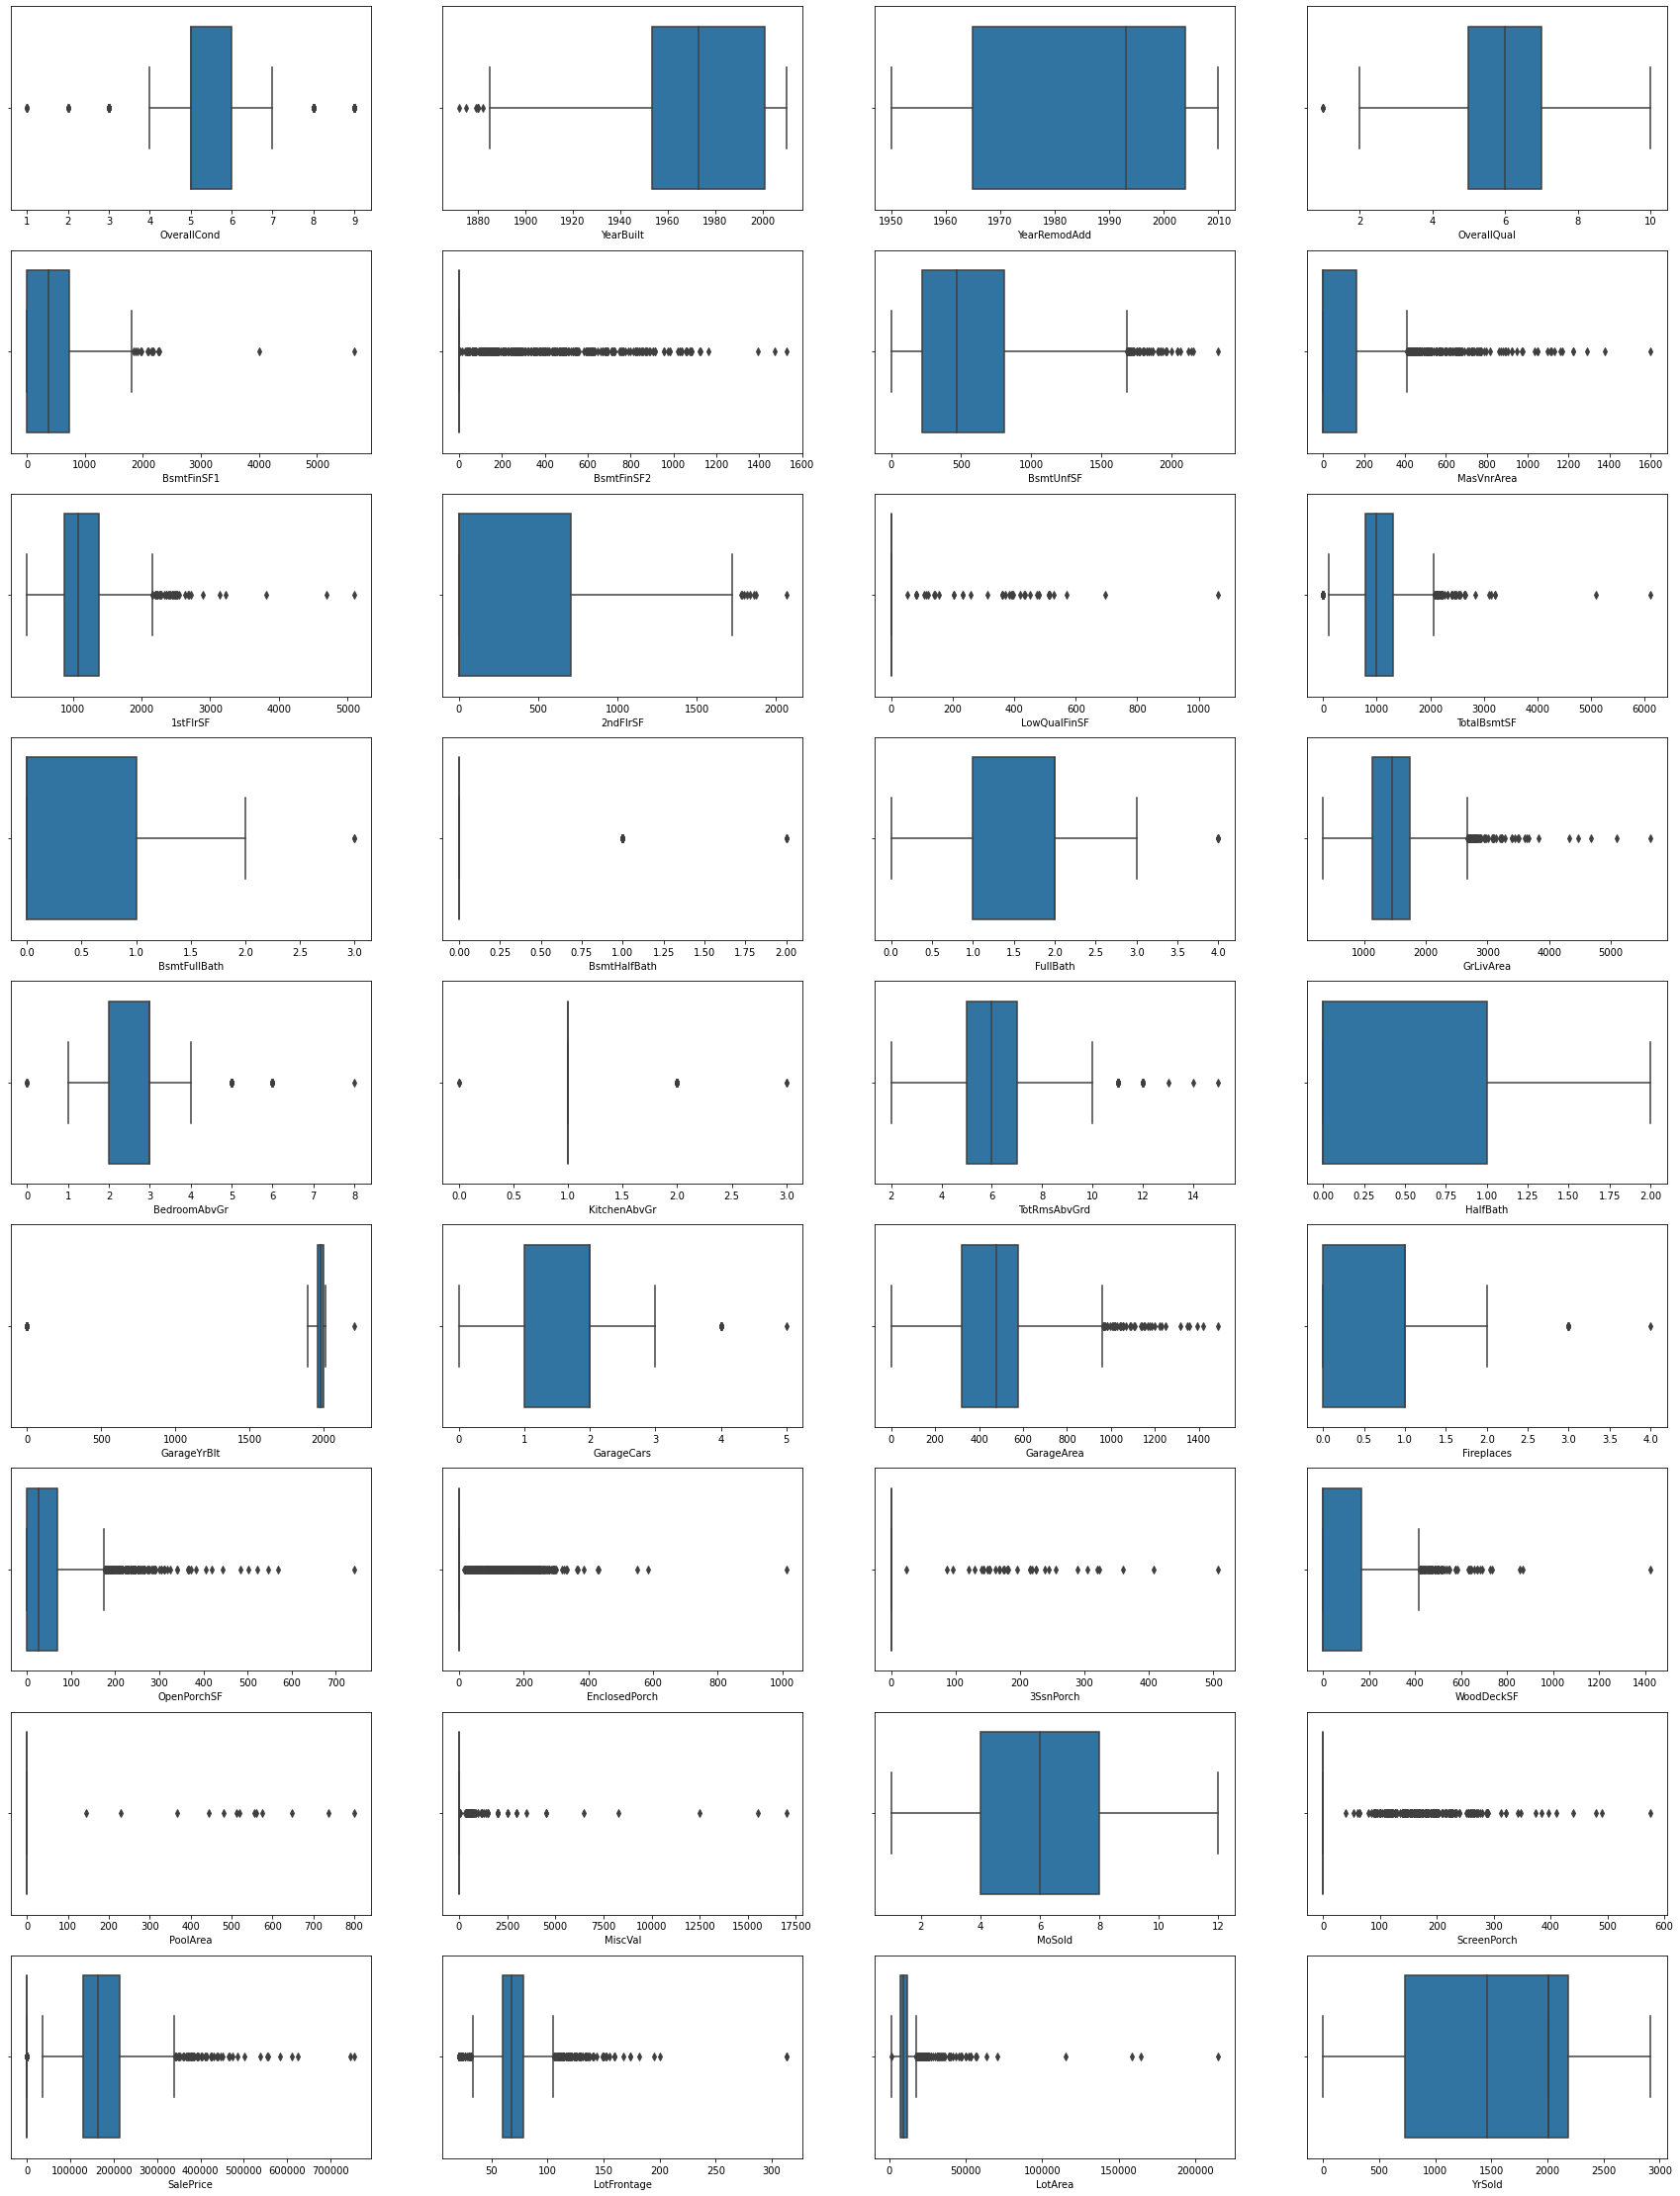

In [26]:
numerical_features = total_data.select_dtypes(exclude = 'object').columns
figure, axes = plt.subplots(nrows = len(numerical_features)//4, 
                            ncols = 4, 
                            figsize = (30,40))

for i, feature in enumerate(numerical_features):
    sns.boxplot(x = feature, data = total_data, ax = axes[(i//4)-1, int(i%4)-1])

we will remove the features which has highest outliers and which has more than 
40% values has only single values.

In [27]:
total_data.drop(['BsmtFinSF2', 'LotArea', 'ScreenPorch', 
                 'MiscVal', 'PoolArea','EnclosedPorch', 
                 '3SsnPorch', 'BedroomAbvGr', 'KitchenAbvGr',
                 'BsmtHalfBath', 'LowQualFinSF'],
                axis = 1, inplace = True
                )


Removing Feature which has less than 20% correlation with SalePrice

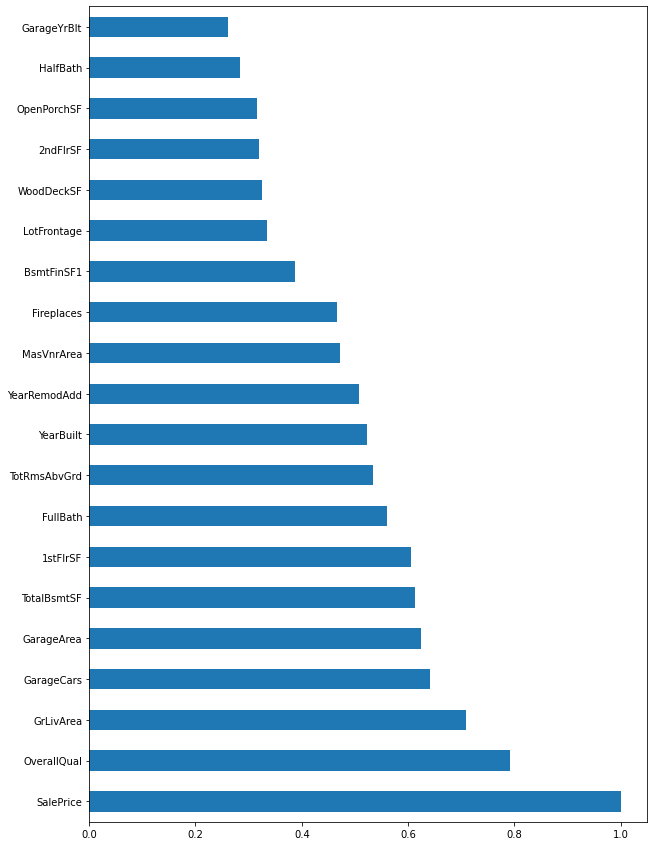

In [28]:
total_data.corr()['SalePrice'].sort_values(ascending = False).head(20).plot.barh(figsize = (10,15))

In [29]:
total_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334544
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
GarageYrBlt     0.261366
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
MoSold          0.046432
Id             -0.021917
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

In [30]:
"""
Here we will remove features which has correlation value w.r.t 
SalePrice less than 20%, and greater than -10%. 
"""
total_data.drop(['MoSold','YrSold','OverallCond',
                 'MSSubClass'], axis = 1, inplace = True)


In [31]:
total_data

,Id,LotFrontage,Street,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice
0,1,65.0,Pave,Reg,CollgCr,2Story,7,2003,2003,VinylSd,...,0,Attchd,2003.0,RFn,2.0,548.0,0,61,Normal,208500.0
1,2,80.0,Pave,Reg,Veenker,1Story,6,1976,1976,MetalSd,...,1,Attchd,1976.0,RFn,2.0,460.0,298,0,Normal,181500.0
2,3,68.0,Pave,IR1,CollgCr,2Story,7,2001,2002,VinylSd,...,1,Attchd,2001.0,RFn,2.0,608.0,0,42,Normal,223500.0
3,4,60.0,Pave,IR1,Crawfor,2Story,7,1915,1970,Wd Sdng,...,1,Detchd,1998.0,Unf,3.0,642.0,0,35,Abnorml,140000.0
4,5,84.0,Pave,IR1,NoRidge,2Story,8,2000,2000,VinylSd,...,1,Attchd,2000.0,RFn,3.0,836.0,192,84,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,Pave,Reg,MeadowV,2Story,4,1970,1970,CemntBd,...,0,NA,0.0,NA,0.0,0.0,0,0,Normal,NaN
1455,2916,21.0,Pave,Reg,MeadowV,2Story,4,1970,1970,CemntBd,...,0,CarPort,1970.0,Unf,1.0,286.0,0,24,Abnorml,NaN
1456,2917,160.0,Pave,Reg,Mitchel,1Story,5,1960,1996,VinylSd,...,1,Detchd,1960.0,Unf,2.0,576.0,474,0,Abnorml,NaN
1457,2918,62.0,Pave,Reg,Mitchel,SFoyer,5,1992,1992,HdBoard,...,0,NA,0.0,NA,0.0,0.0,80,32,Normal,NaN


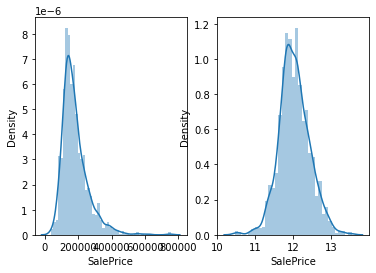

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)

sns.distplot(total_data['SalePrice'], ax = axes[0])

# as it is slightly skewed we apply log on that

total_data['SalePrice'] = np.log1p(total_data['SalePrice'])

sns.distplot(total_data['SalePrice'], ax = axes[1])

In [33]:
total_data.isnull().sum().sort_values(ascending = False)

SalePrice        1459
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
SaleCondition       0
HeatingQC           0
Id                  0
LotFrontage         0
BsmtFinSF1          0
Street              0
LotShape            0
Neighborhood        0
HouseStyle          0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtExposure        0
BsmtFinType1        0
BsmtUnfSF           0
dtype: int64

In [34]:
total_data.columns

Index(['Id', 'LotFrontage', 'Street', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [35]:
# Saving processed files
total_data.to_csv('/content/drive/My Drive/Real Time Projects/House Price \
Prediction/Data Files/processed_without_encoding.csv', index=False)

**7. Feature Engineering**

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models.

- Feature Encoding : Transforming the categorical data to numerical data. We will use map function to convert ordinal and binary data to numerical. And one-Hot encoding for nominal Data.



1. Feature Encoding using Map function



In [36]:
total_data.select_dtypes(include = 'object').columns

Index(['Street', 'LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [37]:
total_data.Street = total_data.Street.map({'Grvl':1, 'Pave':2})
total_data.BsmtExposure = total_data.BsmtExposure.map({'NA':0, 'No':1, 
                                                       'Mn':2, 'Av':3, 'Gd':4})
total_data['BsmtFinType1'] = total_data['BsmtFinType1'].map({'NA':0, 'Unf':1, 
                                                             'LwQ':2, 'Rec':3, 
                                                             'BLQ':4, 'ALQ':5, 
                                                             'GLQ':6 })
total_data.BsmtQual = total_data.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 
                                               'Gd':4, 'Ex':5})

total_data.ExterCond = total_data.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 
                                                 'Gd':4, 'Ex':5})
total_data.ExterQual = total_data.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 
                                                 'Gd':4, 'Ex':5})

total_data.HeatingQC = total_data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 
                                                 'Gd':4, 'Ex':5})
total_data.KitchenQual = total_data.KitchenQual.map({'Po':1, 'Fa':2, 
                                                     'TA':3, 'Gd':4, 'Ex':5})

In [38]:
total_data.GarageFinish = total_data.GarageFinish.map({'NA':0, 'Unf':1, 
                                                       'RFn':2, 'Fin':4})
total_data.LotShape = total_data.LotShape.map({'IR3':0, 'IR2':1, 'IR1':2, 
                                               'Reg':4})

In [39]:
total_data.select_dtypes(include = 'object').columns

Index(['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'GarageType', 'SaleCondition'],
      dtype='object')

In [40]:
total_data.reset_index(drop = True, inplace = True)

In [41]:
total_data.select_dtypes(include = 'object').columns

Index(['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'GarageType', 'SaleCondition'],
      dtype='object')

2. Feature Encoding using One - Hot Encoding

In [42]:
categorical_colum = total_data.select_dtypes(include = 'object').columns

In [43]:
print(total_data.columns)

Index(['Id', 'LotFrontage', 'Street', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition', 'SalePrice'],
      dtype='object')


In [44]:
from sklearn.preprocessing import OneHotEncoder 


for  column in categorical_colum:
    enc = OneHotEncoder()

    # tranforming the column after fitting 
    enc = enc.fit_transform(total_data[[column]]).toarray() 

    # converting arrays to a dataframe 
    encoded_colm = pd.DataFrame(enc,columns = set(list(total_data[column])))

    # concating dataframes  
    total_data = pd.concat([total_data, encoded_colm], axis = 1) 

    total_data = total_data.drop([column], axis = 1)  

total_data.head()

,Id,LotFrontage,Street,LotShape,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,2Types,BuiltIn,NA,Attchd,Abnorml,Family,AdjLand,Alloca,Normal,Partial
0,1,65.0,2,4,7,2003,2003,196.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,80.0,2,4,6,1976,1976,0.0,3,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,68.0,2,2,7,2001,2002,162.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,60.0,2,2,7,1915,1970,0.0,3,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,84.0,2,2,8,2000,2000,350.0,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
# Saving processed files
total_data.to_csv('/content/drive/My Drive/Real Time Projects/House Price \
Prediction/Data Files/processed_one_hot_encoder_encoder.csv', index=False)